# The Features

- ascore - Accountability & Transparency Score - %.
- Category -
- description- Mission & Description -
- EIN - ID number -
- tot_exp - Total Expenses in (Program , Funding ,Administrative) .
- admin_exp_p - Administrative Expenses Percentage (of total expenses)%.
- fund_eff - Funding Efficiency in (amount spent to raise 1 in donations) .
- fund_exp_p - Funding Expenses Percentage (of total expenses).
- program_exp_p - Program Expenses Percentage (of total expenses).
- fscore - Financial Score (out of 100)
- leader - Name of Leader
- leader_comp- Compensation of Leader in .
- leader_comp_p-Compensation of Leader Percentage.
- motto-Tagline.
- name -Name of Charity.
- tot_rev-Total Revenue .
- score- Overall Score (out of 100).
- state - State.
- subcategory- Subcategory.
- size- Size of Charity (based on Total Expenses).
- program_exp-Program Expenses in (amount spent on program & services it delivers).
- fund_exp - Funding Expenses in (amount spent on raising money).
- admin_exp -Administrative Expenses in $ (amount spent on overhead, staff, meeting costs).

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [152]:
df = pd.read_csv("RAW_charity_data.csv")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.index = range(1, len(df) + 1) #re-index DataFrame from 1 for accuracy 

In [153]:
df.head(3)

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
1,100.00,Environment,Working with Oregonians to enhance our quality...,93-0642086,917313.00,0.10,0.18,0.18,0.71,88.61,...,Great communities. Working lands. Iconic Places.,1000 Friends of Oregon,1022513.00,91.94,OR,Environmental Protection and Conservation,small,654961.48,168785.59,92648.61
2,89.00,"Arts, Culture, Humanities",Serving the metropolitan Baltimore area and th...,31-1770828,5053059.00,0.23,0.05,0.03,0.73,82.85,...,88.1 FM -. Your NPR News Station,WYPR,5685761.00,85.59,MD,Public Broadcasting and Media,mid,3713998.37,161697.89,1167256.63
3,70.00,Religion,VSS Catholic Communications is dedicated to an...,91-1857425,1891500.00,0.11,0.17,0.20,0.69,86.74,...,Spirit Catholic Radio Network,VSS Catholic Communications,2140836.00,76.80,NE,Religious Media and Broadcasting,small,1299460.50,372625.50,215631.00


In [154]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()   # only works with numbers

,ascore,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,leader_comp,leader_comp_p,tot_rev,score,program_exp,fund_exp,admin_exp
ascore,1.00,0.08,-0.19,-0.04,-0.02,0.15,0.17,0.13,-0.18,0.08,0.70,0.08,0.08,0.07
tot_exp,0.08,1.00,-0.09,-0.06,-0.08,0.12,0.05,0.32,-0.17,0.99,0.08,1.00,0.71,0.68
admin_exp_p,-0.19,-0.09,1.00,0.14,0.08,-0.73,-0.40,0.01,0.22,-0.09,-0.38,-0.10,-0.05,0.07
fund_eff,-0.04,-0.06,0.14,1.00,0.73,-0.60,-0.55,0.02,0.11,-0.06,-0.41,-0.06,0.07,-0.02
fund_exp_p,-0.02,-0.08,0.08,0.73,1.00,-0.74,-0.58,-0.04,0.18,-0.08,-0.43,-0.09,0.08,-0.07
program_exp_p,0.15,0.12,-0.73,-0.60,-0.74,1.00,0.67,0.02,-0.27,0.11,0.55,0.13,-0.02,0.00
fscore,0.17,0.05,-0.40,-0.55,-0.58,0.67,1.00,0.05,-0.18,0.05,0.80,0.05,-0.04,0.01
leader_comp,0.13,0.32,0.01,0.02,-0.04,0.02,0.05,1.00,-0.04,0.32,0.12,0.30,0.30,0.43
leader_comp_p,-0.18,-0.17,0.22,0.11,0.18,-0.27,-0.18,-0.04,1.00,-0.17,-0.23,-0.17,-0.14,-0.19
tot_rev,0.08,0.99,-0.09,-0.06,-0.08,0.11,0.05,0.32,-0.17,1.00,0.08,0.99,0.70,0.67


In [155]:
df[['description','motto','ein','leader']]

,description,motto,ein,leader
1,Working with Oregonians to enhance our quality...,Great communities. Working lands. Iconic Places.,93-0642086,Lynn Peterson
2,Serving the metropolitan Baltimore area and th...,88.1 FM -. Your NPR News Station,31-1770828,Anthony S. Brandon
3,VSS Catholic Communications is dedicated to an...,Spirit Catholic Radio Network,91-1857425,Jim Carroll
4,The mission of the Utah Symphony & Opera is to...,"Engaging, educating, and enriching lives",51-0145980,Paul Meecham
5,"Funded solely by the footwear industry, Two Te...",Shoepeople Helping Shoepeople,22-2579809,Neal Newman
...,...,...,...,...
8404,"Founded in 1900, Yaddo is an artists' communit...",Nurturing the creative process,14-1343055,Elaina Richardson
8405,Yad L'Achim was established in 1950. It is a n...,Promoting the adherence to Orthodox Jewish obs...,23-7126417,This organization did not report a CEO
8406,Yad Ezra opened its doors in 1990 with the pur...,Feeding the Jewish hungry,38-2904733,Lea Luger
8407,"Rawhide, where commitment and compassion meet....",Dedicated to helping at-risk youth and their f...,39-1052471,John Solberg


# Data Restructure
- ##### Reorder the features because they don't make sense in order to make the data easier to read
- ##### Drop 4 columns because it has a lot of description and explanation and may be useful in another project¶
 description: Mission & Description
ein: : Name of Leader
leader: Name of Leader
motto::Tagline like slogan 

In [156]:
df_re= df[[ 'name','state','category','subcategory','tot_rev','tot_exp','size','admin_exp','admin_exp_p','fund_exp','fund_exp_p','fund_eff','program_exp','program_exp_p','leader_comp','leader_comp_p','fscore','ascore','score']]
df_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 1 to 8408
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8408 non-null   object 
 1   state          8408 non-null   object 
 2   category       8408 non-null   object 
 3   subcategory    8408 non-null   object 
 4   tot_rev        8408 non-null   float64
 5   tot_exp        8408 non-null   float64
 6   size           8408 non-null   object 
 7   admin_exp      8408 non-null   float64
 8   admin_exp_p    8408 non-null   float64
 9   fund_exp       8408 non-null   float64
 10  fund_exp_p     8408 non-null   float64
 11  fund_eff       8408 non-null   float64
 12  program_exp    8408 non-null   float64
 13  program_exp_p  8408 non-null   float64
 14  leader_comp    7972 non-null   float64
 15  leader_comp_p  7972 non-null   float64
 16  fscore         8408 non-null   float64
 17  ascore         8408 non-null   float64
 18  score   

In [157]:
df = df.round(4)
df.head()

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
1,100.00,Environment,Working with Oregonians to enhance our quality...,93-0642086,917313.00,0.10,0.18,0.18,0.71,88.61,...,Great communities. Working lands. Iconic Places.,1000 Friends of Oregon,1022513.00,91.94,OR,Environmental Protection and Conservation,small,654961.48,168785.59,92648.61
2,89.00,"Arts, Culture, Humanities",Serving the metropolitan Baltimore area and th...,31-1770828,5053059.00,0.23,0.05,0.03,0.73,82.85,...,88.1 FM -. Your NPR News Station,WYPR,5685761.00,85.59,MD,Public Broadcasting and Media,mid,3713998.37,161697.89,1167256.63
3,70.00,Religion,VSS Catholic Communications is dedicated to an...,91-1857425,1891500.00,0.11,0.17,0.20,0.69,86.74,...,Spirit Catholic Radio Network,VSS Catholic Communications,2140836.00,76.80,NE,Religious Media and Broadcasting,small,1299460.50,372625.50,215631.00
4,93.00,"Arts, Culture, Humanities",The mission of the Utah Symphony & Opera is to...,51-0145980,22506582.00,0.09,0.08,0.05,0.85,91.03,...,"Engaging, educating, and enriching lives",Utah Symphony & Opera,22203175.00,91.95,UT,Performing Arts,big,19175607.86,1215355.43,2070605.54
5,100.00,Human Services,"Funded solely by the footwear industry, Two Te...",22-2579809,5594243.00,0.13,0.12,0.12,0.75,86.23,...,Shoepeople Helping Shoepeople,Two Ten Footwear Foundation,6935506.00,90.26,MA,Social Services,mid,4195682.25,682497.65,704874.62


In [158]:
df_re.head(3)

,name,state,category,subcategory,tot_rev,tot_exp,size,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
1,1000 Friends of Oregon,OR,Environment,Environmental Protection and Conservation,1022513.00,917313.00,small,92648.61,0.10,168785.59,0.18,0.18,654961.48,0.71,0.00,0.00,88.61,100.00,91.94
2,WYPR,MD,"Arts, Culture, Humanities",Public Broadcasting and Media,5685761.00,5053059.00,mid,1167256.63,0.23,161697.89,0.03,0.05,3713998.37,0.73,163341.00,0.03,82.85,89.00,85.59
3,VSS Catholic Communications,NE,Religion,Religious Media and Broadcasting,2140836.00,1891500.00,small,215631.00,0.11,372625.50,0.20,0.17,1299460.50,0.69,114791.00,0.06,86.74,70.00,76.80


## DATA EXPLORATION


In [159]:
#shape and summary
df.shape

(8408, 23)

In [160]:
df.columns 

Index(['ascore', 'category', 'description', 'ein', 'tot_exp', 'admin_exp_p',
       'fund_eff', 'fund_exp_p', 'program_exp_p', 'fscore', 'leader',
       'leader_comp', 'leader_comp_p', 'motto', 'name', 'tot_rev', 'score',
       'state', 'subcategory', 'size', 'program_exp', 'fund_exp', 'admin_exp'],
      dtype='object')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 1 to 8408
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ascore         8408 non-null   float64
 1   category       8408 non-null   object 
 2   description    8408 non-null   object 
 3   ein            8408 non-null   object 
 4   tot_exp        8408 non-null   float64
 5   admin_exp_p    8408 non-null   float64
 6   fund_eff       8408 non-null   float64
 7   fund_exp_p     8408 non-null   float64
 8   program_exp_p  8408 non-null   float64
 9   fscore         8408 non-null   float64
 10  leader         8408 non-null   object 
 11  leader_comp    7972 non-null   float64
 12  leader_comp_p  7972 non-null   float64
 13  motto          8394 non-null   object 
 14  name           8408 non-null   object 
 15  tot_rev        8408 non-null   float64
 16  score          8408 non-null   float64
 17  state          8408 non-null   object 
 18  subcateg

In [162]:
df.nunique()

ascore             56
category           11
description      8390
ein              8408
tot_exp          8405
admin_exp_p       364
fund_eff           82
fund_exp_p        341
program_exp_p     534
fscore           2747
leader           8028
leader_comp      6983
leader_comp_p    1284
motto            7691
name             8405
tot_rev          8401
score            2541
state              53
subcategory        37
size                3
program_exp      8408
fund_exp         8408
admin_exp        8408
dtype: int64

size
small    4050
mid      2908
big      1450
Name: count, dtype: int64


<Axes: xlabel='size', ylabel='count'>

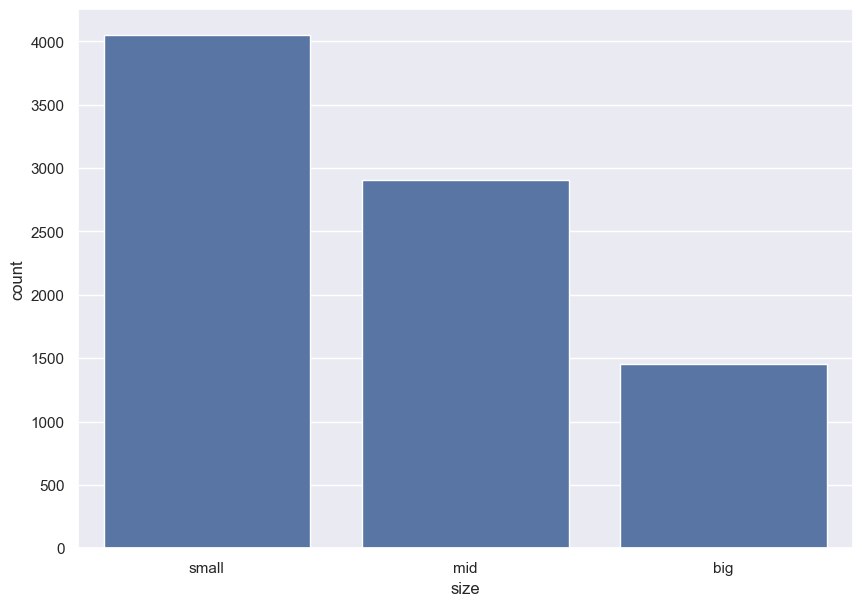

In [163]:
print (df_re['size'].value_counts())
plt.figure(figsize = (10,7))
sns.countplot(x="size", data=df_re)

category
Human Services                2379
Arts, Culture, Humanities     1218
Health                         847
Community Development          803
Education                      667
International                  610
Animals                        454
Religion                       450
Environment                    429
Human and Civil Rights         346
Research and Public Policy     205
Name: count, dtype: int64


C:\Users\Sandeep S Chhetri\AppData\Local\Temp\ipykernel_12964\1947804417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="category",palette='Set2', data=df_re,order = df_re['category'].value_counts().index, )


<Axes: xlabel='count', ylabel='category'>

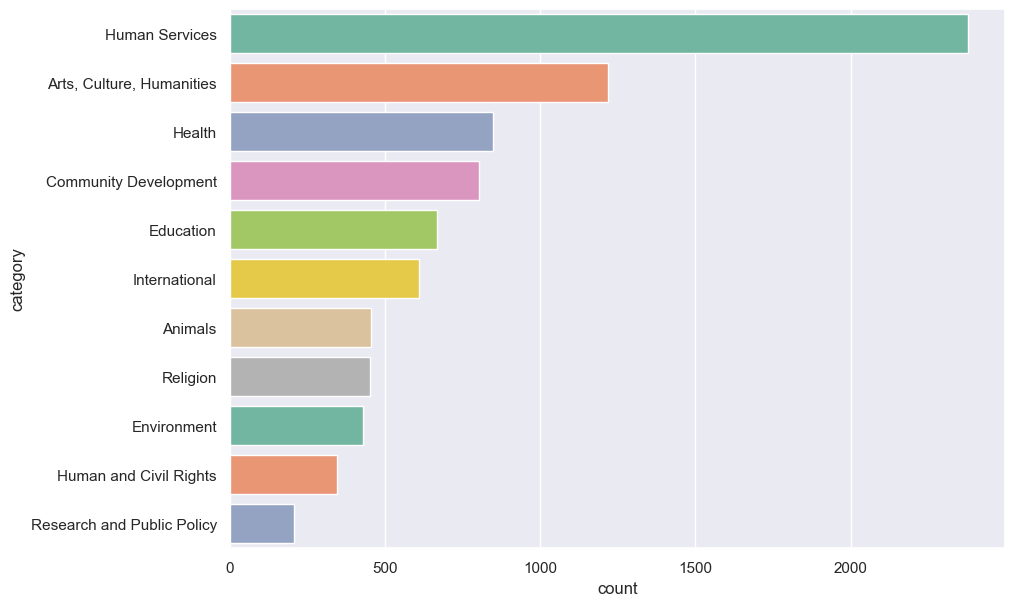

In [164]:
print( df_re['category'].value_counts())
plt.figure(figsize = (10,7))
sns.countplot(y="category",palette='Set2', data=df_re,order = df_re['category'].value_counts().index, )

C:\Users\Sandeep S Chhetri\AppData\Local\Temp\ipykernel_12964\3283290584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="subcategory", data=df_re, palette="Set3",order = df_re['subcategory'].value_counts().index)


<Axes: xlabel='count', ylabel='subcategory'>

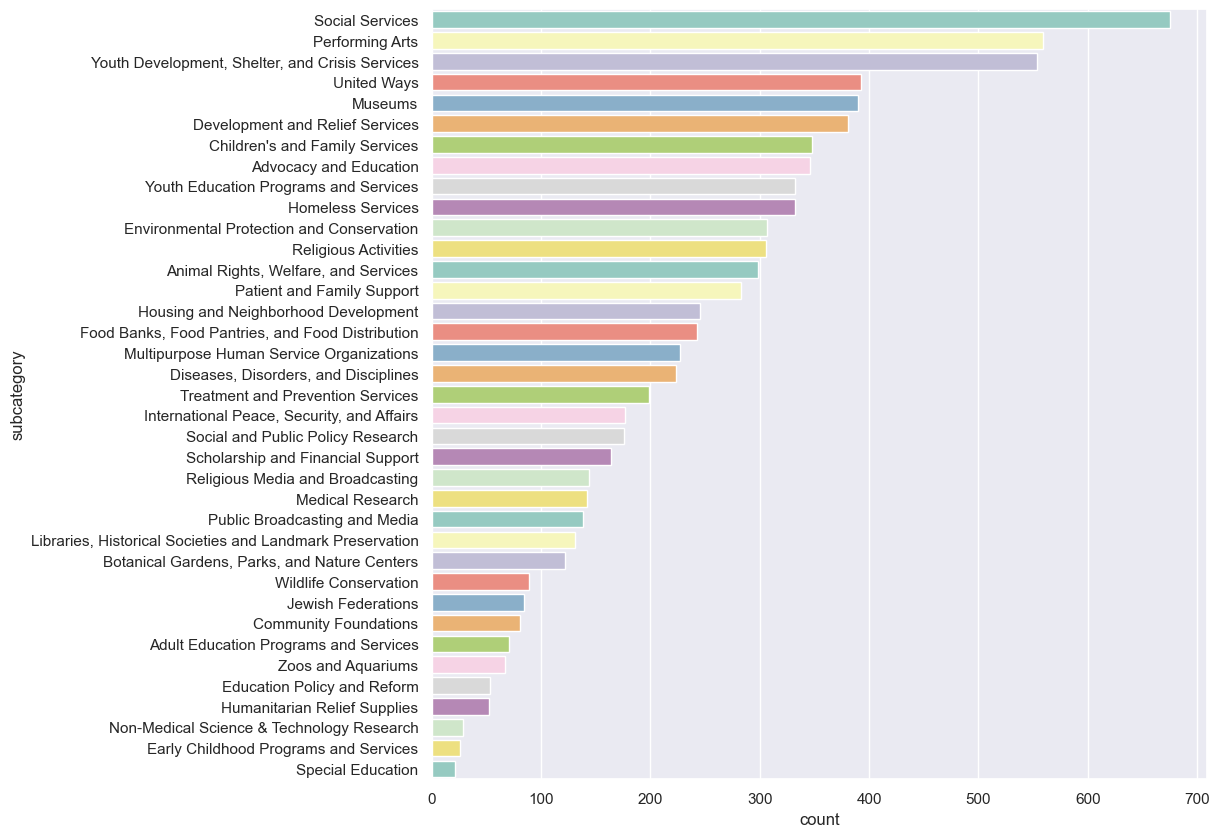

In [165]:
plt.figure(figsize = (10,10))
sns.countplot(y="subcategory", data=df_re, palette="Set3",order = df_re['subcategory'].value_counts().index)

In [166]:
df_re.describe(include = "object")

,name,state,category,subcategory,size
count,8408,8408,8408,8408,8408
unique,8405,53,11,37,3
top,United Way of Anderson County,CA,Human Services,Social Services,small
freq,2,992,2379,675,4050


In [167]:
df_re.loc[df_re['name']=='United Way of Anderson County']

,name,state,category,subcategory,tot_rev,tot_exp,size,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
4031,United Way of Anderson County,TN,Community Development,United Ways,1180003.00,1117648.00,small,115117.74,0.10,92764.78,0.08,0.08,908647.82,0.81,NaN,NaN,83.94,81.00,82.40
4032,United Way of Anderson County,SC,Community Development,United Ways,2067257.00,2197904.00,small,145061.66,0.07,219790.40,0.10,0.10,1828656.13,0.83,101037.00,0.05,79.48,93.00,84.66


### To Check For Total Duplicated Values

In [168]:
print(df_re.duplicated().sum())

0


In [169]:
df_re['category'].value_counts()

category
Human Services                2379
Arts, Culture, Humanities     1218
Health                         847
Community Development          803
Education                      667
International                  610
Animals                        454
Religion                       450
Environment                    429
Human and Civil Rights         346
Research and Public Policy     205
Name: count, dtype: int64

In [170]:
df_re['state'].value_counts()

state
CA    992
NY    963
TX    465
DC    447
FL    423
MA    344
VA    316
IL    309
PA    293
OH    250
CO    246
WA    213
MN    209
GA    207
MI    201
NC    195
TN    176
MD    167
NJ    166
MO    156
CT    130
IN    129
WI    129
AZ    124
OR    115
OK     80
SC     75
KY     73
AL     66
NE     61
LA     60
KS     57
UT     50
ME     48
IA     47
MT     44
MS     37
NM     36
NH     33
NV     33
RI     31
AR     31
VT     30
HI     28
DE     23
SD     23
ID     20
AK     17
WV     15
WY     13
ND      8
PR      3
VI      1
Name: count, dtype: int64

In [171]:
df = df.round(4)
df.describe()


,ascore,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,leader_comp,leader_comp_p,tot_rev,score,program_exp,fund_exp,admin_exp
count,8408.00,8408.00,8408.00,8408.00,8408.00,8408.00,8408.00,7972.00,7972.00,8408.00,8408.00,8408.00,8408.00,8408.00
mean,90.72,14484281.34,0.11,0.11,0.09,0.81,85.95,164159.28,0.04,15827234.06,86.87,12430698.30,892930.75,1138577.91
std,9.77,69437316.63,0.06,0.09,0.06,0.09,9.76,145319.13,0.03,75576578.30,8.05,63494723.56,4355881.68,4362715.93
min,28.00,53213.00,0.00,0.01,0.00,0.05,0.00,0.00,0.00,-2049209.00,14.48,35003.83,332.85,334.84
25%,89.00,1942998.50,0.06,0.05,0.04,0.76,81.13,89975.00,0.01,2022281.00,83.26,1509135.70,142160.51,178817.90
50%,93.00,3656226.50,0.10,0.09,0.08,0.81,87.46,131633.00,0.03,3951672.00,88.31,2930645.13,293598.14,343718.03
75%,97.00,8859808.00,0.14,0.14,0.12,0.86,92.50,197748.00,0.05,9785275.75,92.02,7215094.44,643163.33,774559.81
max,100.00,3142984060.00,0.74,1.43,0.92,1.00,100.00,3691019.00,0.53,3608002096.00,100.00,2809827749.64,201150979.84,157408643.68


In [172]:
df_re.loc[df_re['tot_rev']<10]

,name,state,category,subcategory,tot_rev,tot_exp,size,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
1656,The Negev Foundation,OH,International,Development and Relief Services,-700136.00,471259.00,small,118757.27,0.25,17436.58,0.04,0.07,334122.63,0.71,163461.00,0.35,81.18,81.00,81.08
4743,America's Packard Museum,OH,"Arts, Culture, Humanities",Museums,-836716.00,358766.00,small,93637.93,0.26,15426.94,0.04,0.01,248983.60,0.69,NaN,NaN,90.87,62.00,72.36
6617,Camp Soaring Eagle Foundation,AZ,Health,Patient and Family Support,-777555.00,468778.00,small,83911.26,0.18,88130.26,0.19,0.36,295798.92,0.63,NaN,NaN,48.74,36.00,42.01
6623,Camp Korey,WA,Health,Patient and Family Support,-2049209.00,4884551.00,mid,600799.77,0.12,962256.55,0.20,0.21,3316610.13,0.68,23077.00,0.00,69.21,96.00,78.04


In [173]:
df_re.loc[df_re['leader_comp']==0].head() #entire data for where leader_comp=0


,name,state,category,subcategory,tot_rev,tot_exp,size,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
1,1000 Friends of Oregon,OR,Environment,Environmental Protection and Conservation,1022513.00,917313.00,small,92648.61,0.10,168785.59,0.18,0.18,654961.48,0.71,0.00,0.00,88.61,100.00,91.94
31,Issaquah Schools Foundation,WA,Education,Scholarship and Financial Support,1884567.00,1780418.00,small,254599.77,0.14,268843.12,0.15,0.14,1253414.27,0.70,0.00,0.00,80.82,96.00,86.14
53,Iranian American Jewish Federation of New York,NY,Community Development,Jewish Federations,4440104.00,4104978.00,mid,147779.21,0.04,410497.80,0.10,0.08,3538491.04,0.86,0.00,0.00,97.50,100.00,98.23
66,Interstitial Cystitis Association,VA,Health,"Diseases, Disorders, and Disciplines",547011.00,766632.00,small,65930.35,0.09,91229.21,0.12,0.17,607939.18,0.79,0.00,0.00,70.87,94.00,78.96
72,International Waldenstrom's Macroglobulinemia ...,FL,Health,Medical Research,2810867.00,2762604.00,small,193382.28,0.07,375714.14,0.14,0.11,2187982.37,0.79,0.00,0.00,93.34,100.00,95.29


In [174]:
df_re.isnull().sum()

name               0
state              0
category           0
subcategory        0
tot_rev            0
tot_exp            0
size               0
admin_exp          0
admin_exp_p        0
fund_exp           0
fund_exp_p         0
fund_eff           0
program_exp        0
program_exp_p      0
leader_comp      436
leader_comp_p    436
fscore             0
ascore             0
score              0
dtype: int64

<Axes: >

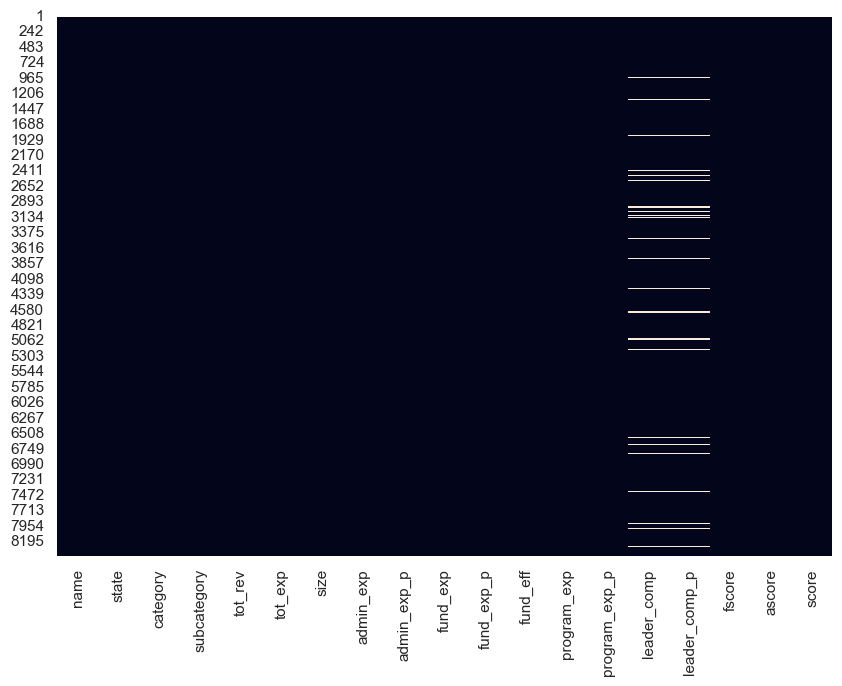

In [175]:
plt.figure(figsize = (10,7))

sns.heatmap( df_re.isnull(),cbar=False)

## Purpose:
### Helps you visually inspect the spread and outliers of multiple numeric columns in your DataFrame, one box plot per column.

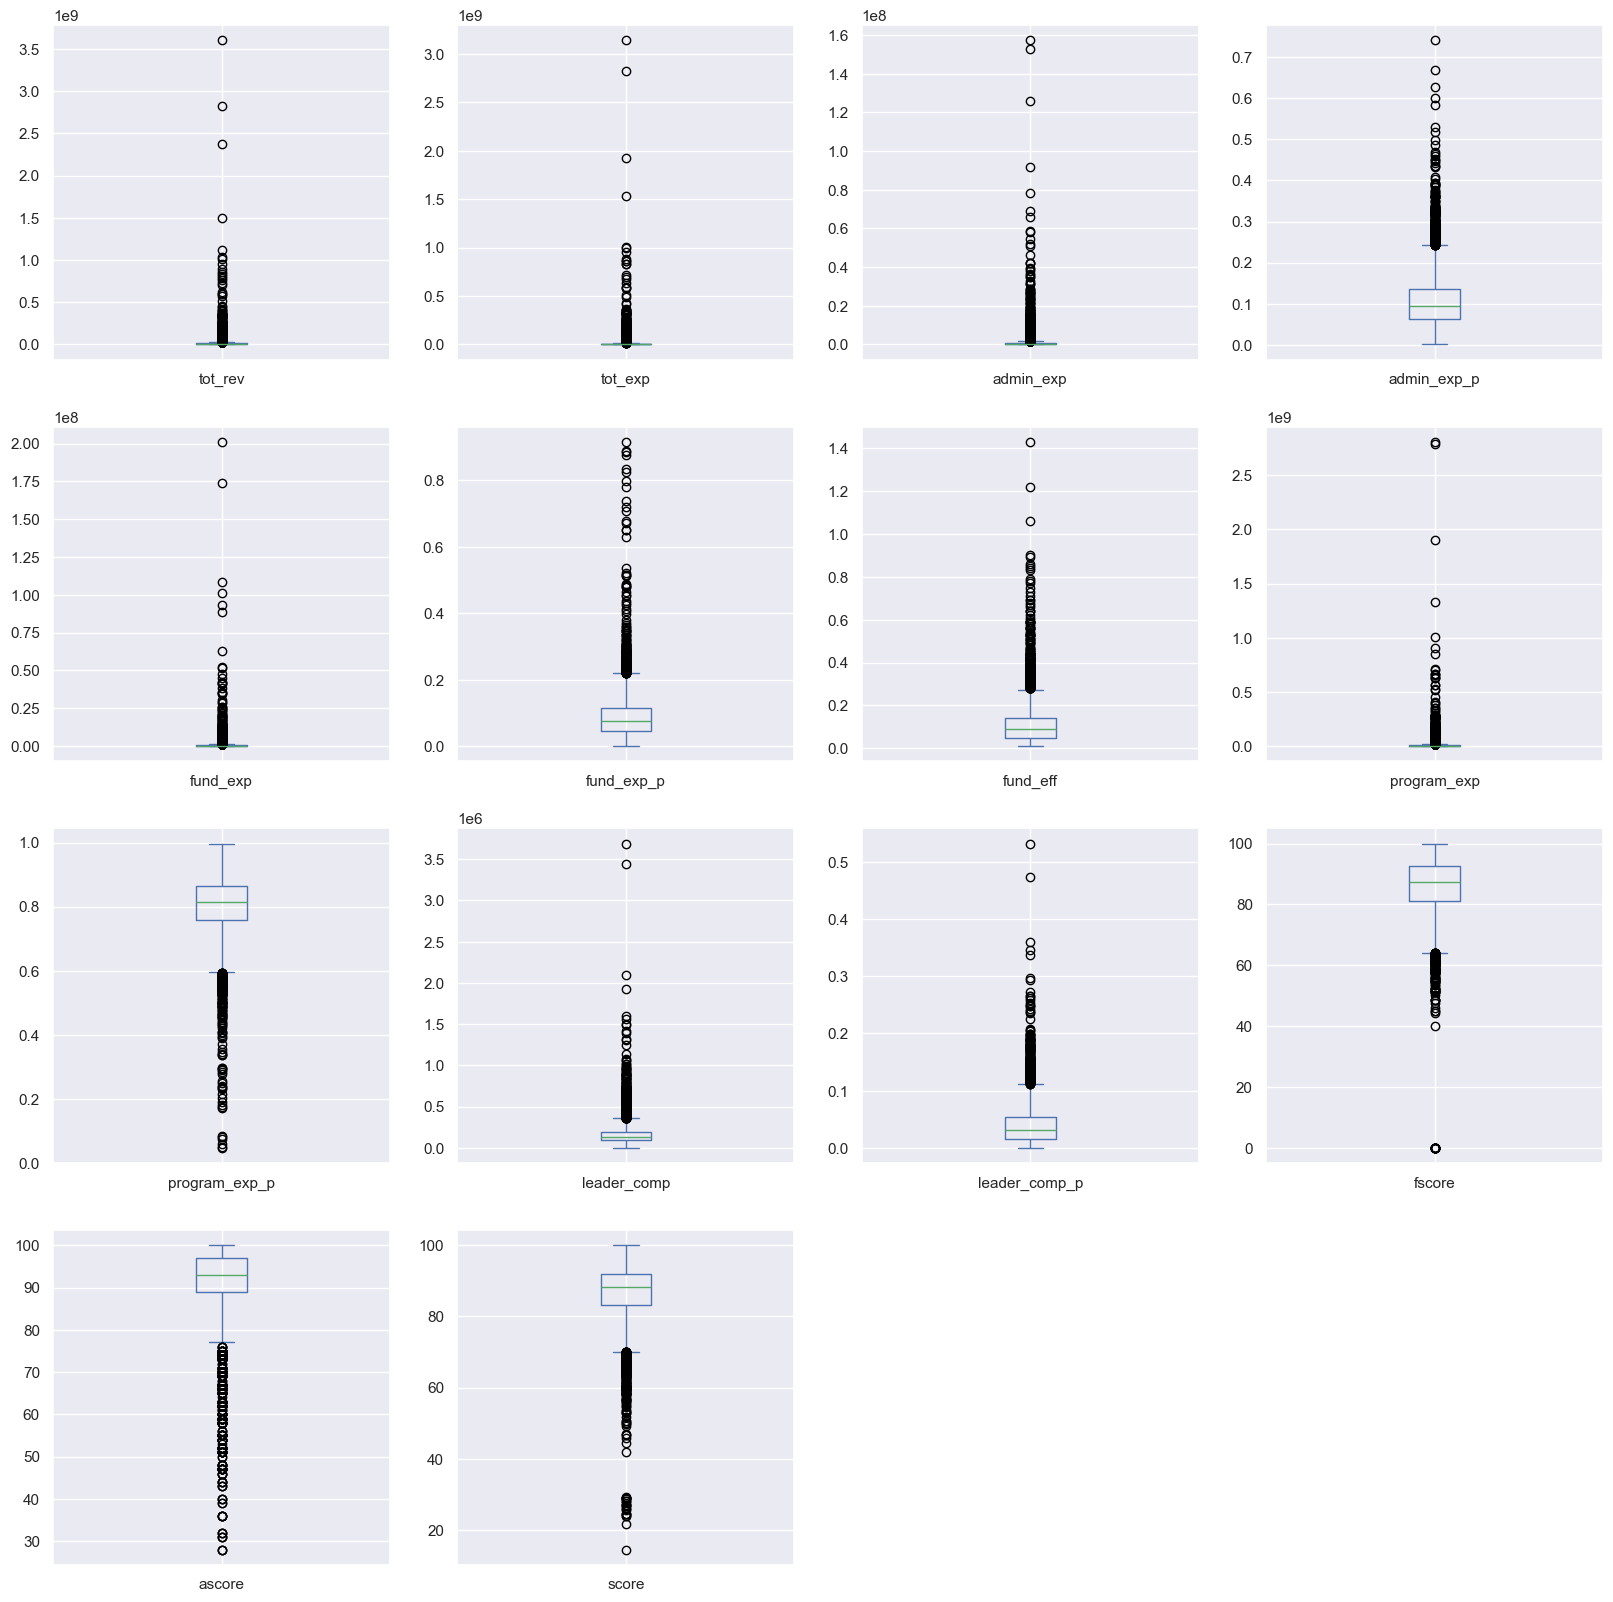

In [176]:
df_re.plot(kind = "box" , subplots = True , figsize = (20,20) ,  layout = (4,4))
plt.show()

## Purpose:
#### To visualize the distribution (shape, skewness, spread) of numeric values in your dataset. It's helpful for spotting:

#### 1. Normal vs skewed distributions

#### 2. Clusters

#### 3. Gaps or outliers

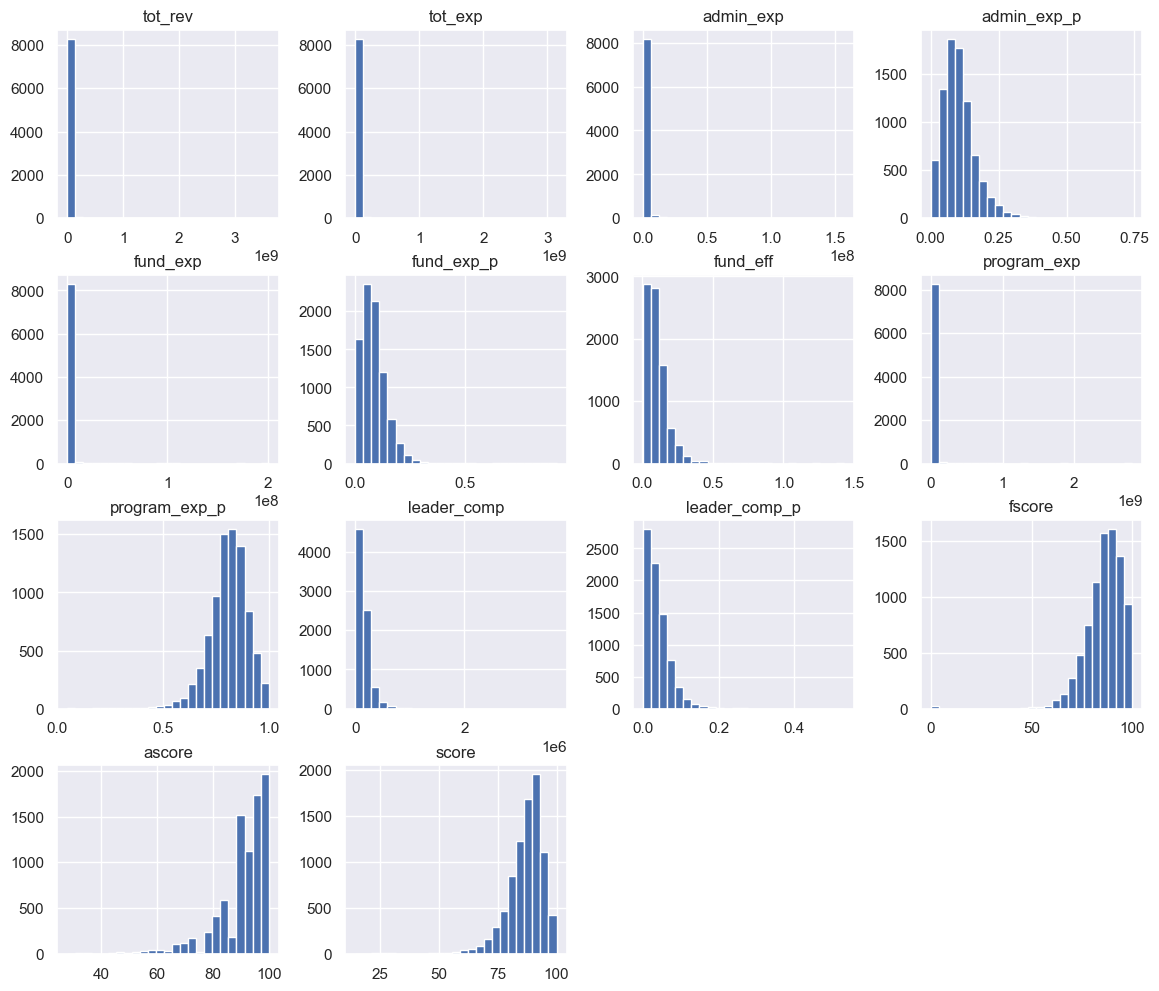

In [177]:
df_re.hist(bins=25,figsize=(14,12))
plt.show()

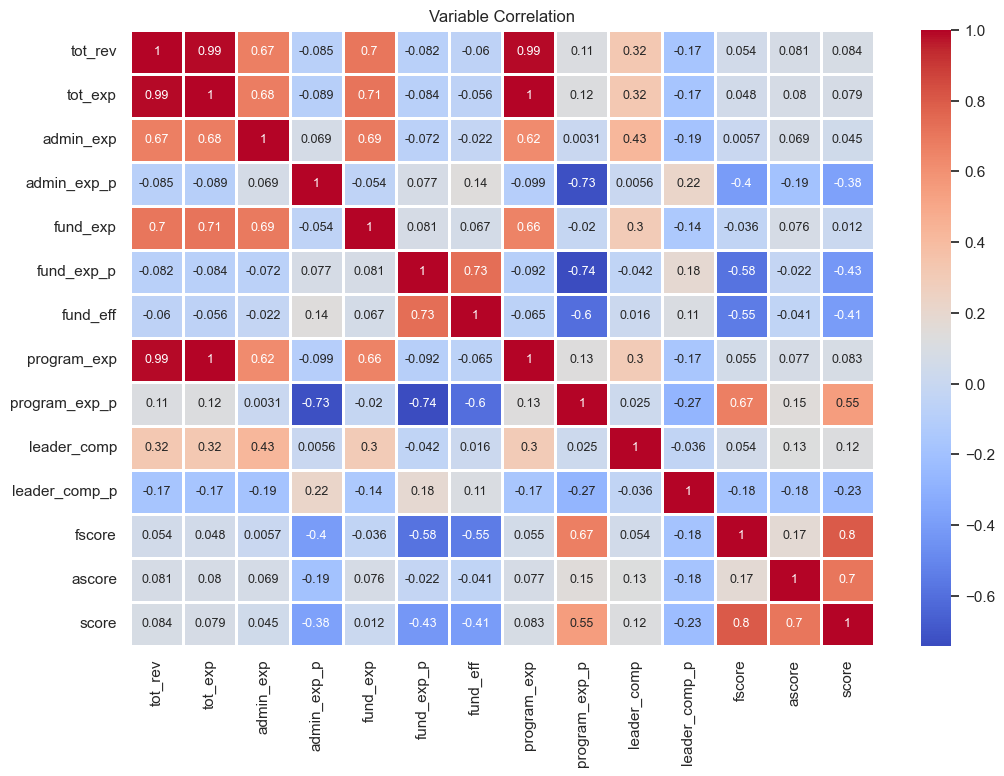

In [178]:
# Select only numeric columns first
numeric_df = df_re.select_dtypes(include='number')

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', linewidth=1, annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')
plt.show()

# Observation after data exploring
1. Need to add column for the names of the states and their regions,through join another data set.
2. There are negative values in the total revenue.
3. Missing data in the compensation of leaders in the columns for percentages and amounts.                                                                    
4. There are outlier data in total revenues, total expenses, and all expenses columns because there are some charities their revenue amount more than billion.
5. Minimum values in the Financial Score and Compensation of Leader, Contain zeros.
6. some states have count of charities more than other states up to 900 charities while some states have between 1 to 20 charities.
7. about positive correlation we have strong relations between total revenue and total expenses, also with program expenses up to 99%.
8.strong correlation between score and financial Score , and also a strong correlation with accountability & Transparency Score.
9. About negative correlation we have strong relations between program expenses percentage and funding expenses percentage , administrative expenses percentage ,Funding Efficiency.
10. The category of the most popular charities in the United States is the Human Services Organization because provide networks of direct services to people in need. They feed our hungry, strengthen our communities, shelter our homeless, care for our elderly, and nurture our young.

## Cleaning and refining data

In [179]:
df.isnull().sum()

ascore             0
category           0
description        0
ein                0
tot_exp            0
admin_exp_p        0
fund_eff           0
fund_exp_p         0
program_exp_p      0
fscore             0
leader             0
leader_comp      436
leader_comp_p    436
motto             14
name               0
tot_rev            0
score              0
state              0
subcategory        0
size               0
program_exp        0
fund_exp           0
admin_exp          0
dtype: int64

In [180]:
df.fillna(0, inplace=True)  # or df.dropna() if that makes more sense


In [181]:
df.isnull().sum() #corrected null values


ascore           0
category         0
description      0
ein              0
tot_exp          0
admin_exp_p      0
fund_eff         0
fund_exp_p       0
program_exp_p    0
fscore           0
leader           0
leader_comp      0
leader_comp_p    0
motto            0
name             0
tot_rev          0
score            0
state            0
subcategory      0
size             0
program_exp      0
fund_exp         0
admin_exp        0
dtype: int64

In [182]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 1 to 8408
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ascore         8408 non-null   float64
 1   category       8408 non-null   object 
 2   description    8408 non-null   object 
 3   ein            8408 non-null   object 
 4   tot_exp        8408 non-null   float64
 5   admin_exp_p    8408 non-null   float64
 6   fund_eff       8408 non-null   float64
 7   fund_exp_p     8408 non-null   float64
 8   program_exp_p  8408 non-null   float64
 9   fscore         8408 non-null   float64
 10  leader         8408 non-null   object 
 11  leader_comp    8408 non-null   float64
 12  leader_comp_p  8408 non-null   float64
 13  motto          8408 non-null   object 
 14  name           8408 non-null   object 
 15  tot_rev        8408 non-null   float64
 16  score          8408 non-null   float64
 17  state          8408 non-null   object 
 18  subcateg

## Normalizing the data


C:\Users\Sandeep S Chhetri\AppData\Local\Temp\ipykernel_12964\3298085957.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Category', y='Percentage', palette='Set2', legend=False)


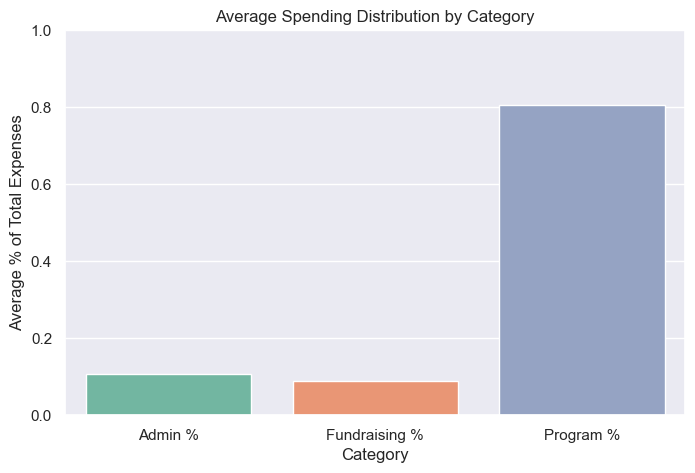

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


labels = ['Admin %', 'Fundraising %', 'Program %']
values = [0.105755, 0.087736, 0.805006]


df_plot = pd.DataFrame({'Category': labels, 'Percentage': values})

plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x='Category', y='Percentage', palette='Set2', legend=False)
plt.ylabel("Average % of Total Expenses")
plt.title("Average Spending Distribution by Category")
plt.ylim(0, 1)
plt.show()


In [184]:
df['name'] = df['name'].str.strip().str.lower()
df.name

1                                  1000 friends of oregon
2                                                    wypr
3                             vss catholic communications
4                                   utah symphony & opera
5                             two ten footwear foundation
                              ...                        
8404                                                yaddo
8405                             yad l'achim peyle israel
8406                                             yad ezra
8407                                              rawhide
8408    the raymond f. kravis center for the performin...
Name: name, Length: 8408, dtype: object

In [185]:
df.name.head(20)

1               1000 friends of oregon
2                                 wypr
3          vss catholic communications
4                utah symphony & opera
5          two ten footwear foundation
6                       syracuse stage
7                quiet hour ministries
8     put on the brakes,  b.r.a.k.e.s.
9                  ozarks food harvest
10           nyc outward bound schools
11                      mystic seaport
12                       lyric theatre
13                                kvie
14                           jvs socal
15      izaak walton league of america
16              zootampa at lowry park
17     zoological society of milwaukee
18                     the zoo society
19                     zoo new england
20                zoo miami foundation
Name: name, dtype: object

In [200]:
df= df[[ 'name','state','category','subcategory','tot_rev','tot_exp','size','admin_exp','admin_exp_p','fund_exp','fund_exp_p','fund_eff','program_exp','program_exp_p','leader_comp','leader_comp_p','fscore','ascore','score']]
df.fillna(0, inplace=True)  # or df.dropna() if that makes more sense

In [201]:
df.to_csv(r'C:\Users\Sandeep S Chhetri\Desktop\transparency\datasets\2. clean data\CLEAN_charity_data.csv',header = True, index=False)

In [203]:
df['admin_percent'] = (df['admin_exp'] / df['fund_exp']) * 100
df['aid_percent'] = (df['program_exp'] / df['tot_rev']) * 100


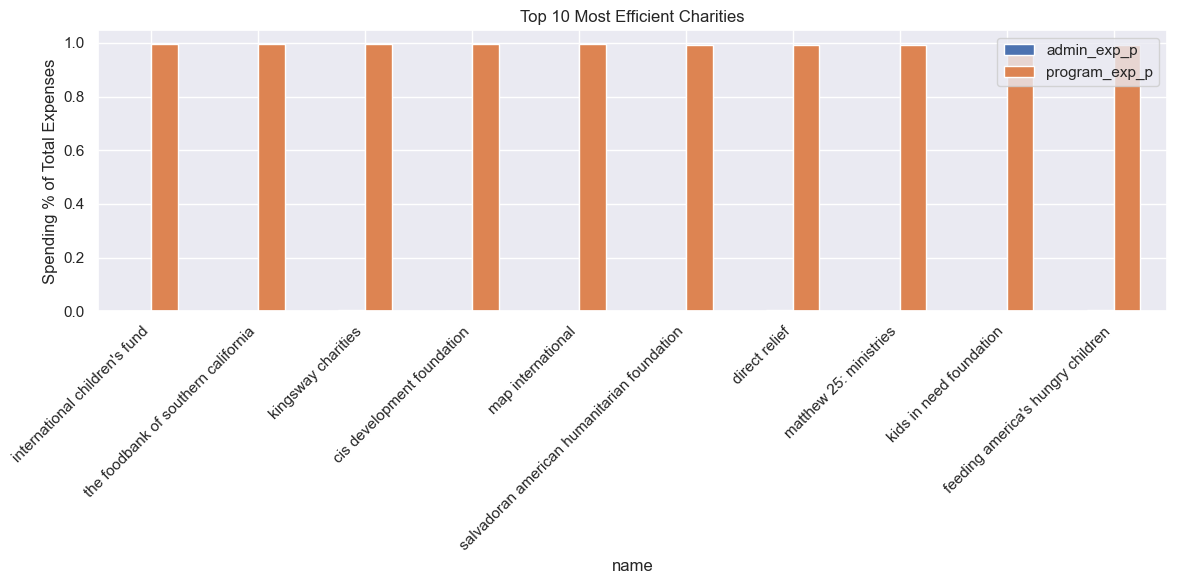

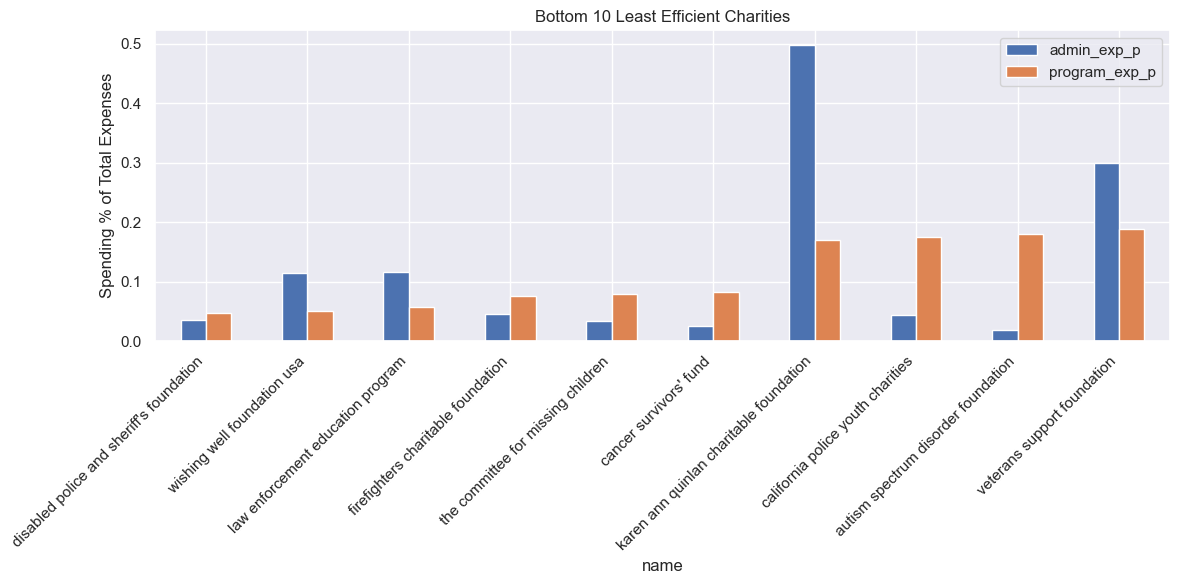

In [204]:
import matplotlib.pyplot as plt

# Top 10 efficient (highest % spent on program)
top_eff = df.sort_values(by='program_exp_p', ascending=False).head(10)

# Bottom 10 efficient
low_eff = df.sort_values(by='program_exp_p', ascending=True).head(10)

# Plot top 10
top_eff[['name', 'admin_exp_p', 'program_exp_p']].set_index('name').plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Most Efficient Charities")
plt.ylabel("Spending % of Total Expenses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot bottom 10
low_eff[['name', 'admin_exp_p', 'program_exp_p']].set_index('name').plot(kind='bar', figsize=(12, 6))
plt.title("Bottom 10 Least Efficient Charities")
plt.ylabel("Spending % of Total Expenses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


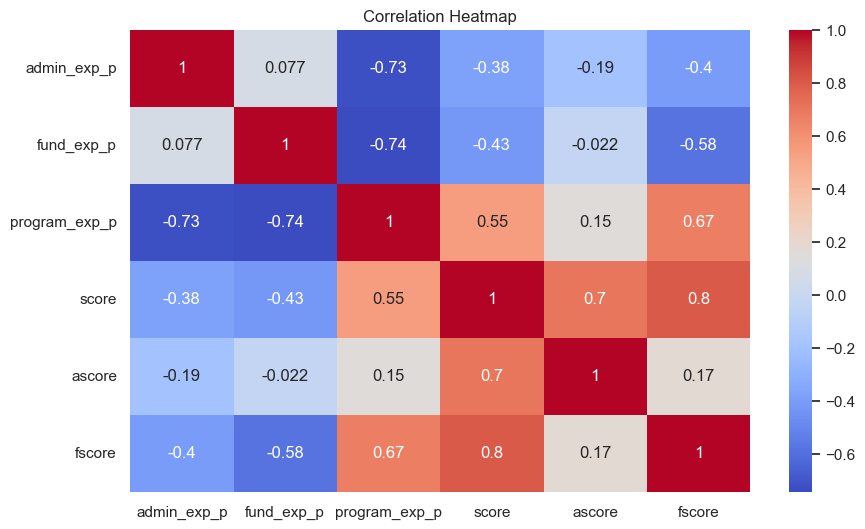

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

#how admin_exp_p affect score, ascore, or fscore

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['admin_exp_p', 'fund_exp_p', 'program_exp_p', 'score', 'ascore', 'fscore']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


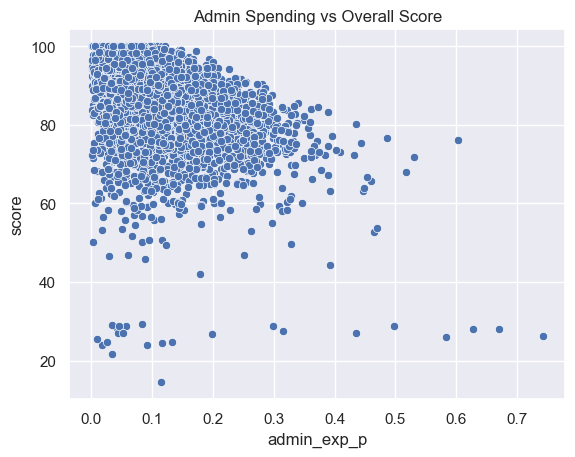

In [208]:
#Individual scatter plot
sns.scatterplot(data=df, x='admin_exp_p', y='score')
plt.title("Admin Spending vs Overall Score")
plt.show()


# Label charities based on a threshold

In [213]:
df['efficiency_label'] = df['program_exp_p'].apply(lambda x: 'Efficient' if x > 0.75 else 'Wasteful')

# Check counts
print(df['efficiency_label'].value_counts())


efficiency_label
Efficient    6482
Wasteful     1926
Name: count, dtype: int64


## Pie Chart of labels

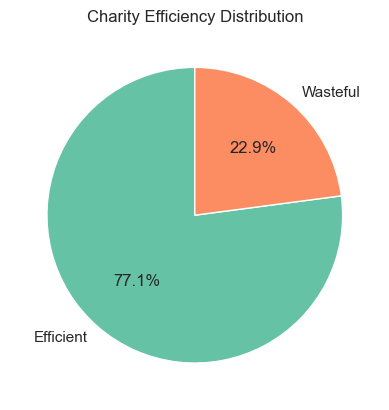

In [212]:
df['efficiency_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], startangle=90)
plt.title("Charity Efficiency Distribution")
plt.ylabel('')
plt.show()


# Analyzing Charity Efficiency by Size
### To find out if smaller charities (based on expenses) are more efficient than larger ones.

In [214]:
#Step 1: Create Size Groups
# Define size thresholds
def size_group(exp):
    if exp < 1_000_000:
        return 'Small'
    elif exp < 10_000_000:
        return 'Medium'
    else:
        return 'Large'

# Apply to dataset
df['size_group'] = df['tot_exp'].apply(size_group)

# Preview group counts
print(df['size_group'].value_counts())


size_group
Medium    6113
Large     1903
Small      392
Name: count, dtype: int64


C:\Users\Sandeep S Chhetri\AppData\Local\Temp\ipykernel_12964\460278730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='size_group', y='program_exp_p', data=df, palette='Set2')


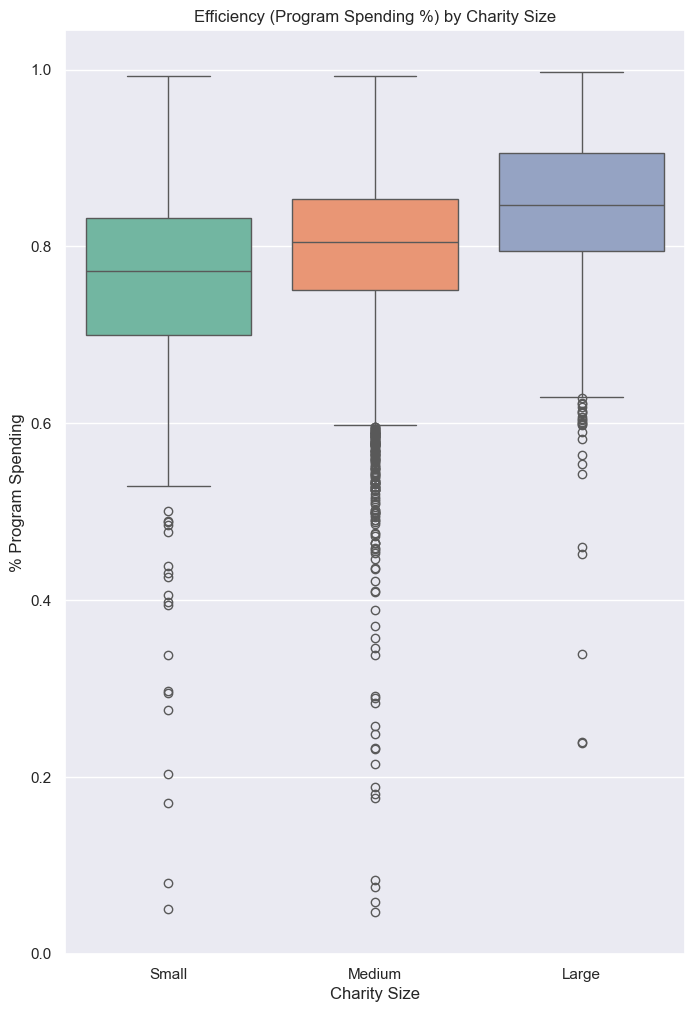

In [219]:
# Step 2: Compare Efficiency (program_exp_p) Across Sizes


# Boxplot: how program spending % varies by size
plt.figure(figsize=(8, 12))
sns.boxplot(x='size_group', y='program_exp_p', data=df, palette='Set2')
plt.title('Efficiency (Program Spending %) by Charity Size')
plt.ylabel('% Program Spending')
plt.xlabel('Charity Size')
plt.show()


In [220]:
# Statistical Summary
# Grouped mean
df.groupby('size_group')['program_exp_p'].mean()


size_group
Large    0.84
Medium   0.80
Small    0.75
Name: program_exp_p, dtype: float64